# Dev test

In [1]:
import os

import micromagneticdata as md

In [2]:
dirname = os.path.join("..", "micromagneticdata", "tests", "test_sample")

In [3]:
data = md.Data(name="system_name", dirname=dirname)

In [4]:
data.n

7

In [5]:
data.info

,drive_number,date,time,driver,t,n,Hmin,Hmax
0,0,2022-02-11,12:51:44,TimeDriver,2.500000e-11,25.0,NaN,NaN
1,1,2022-02-11,12:51:45,TimeDriver,1.500000e-11,15.0,NaN,NaN
2,2,2022-02-11,12:51:45,TimeDriver,5.000000e-12,10.0,NaN,NaN
3,3,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
4,4,2022-02-11,12:51:46,TimeDriver,5.000000e-12,5.0,NaN,NaN
5,5,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
6,6,2022-02-11,12:51:47,HysteresisDriver,NaN,21.0,"[0, 0, 1000000.0]","[0, 0, -1000000.0]"


In [6]:
drive = data[0]

In [7]:
drive.n

25

In [8]:
drive.info

{'drive_number': 0,
 'date': '2022-02-11',
 'time': '12:51:44',
 'driver': 'TimeDriver',
 't': 2.5e-11,
 'n': 25}

In [9]:
data.selector()

BoundedIntText(value=0, description='drive', max=6)

In [10]:
drive = data[-1]

In [11]:
drive.x

'B_hysteresis'

In [12]:
drive.info

{'drive_number': 6,
 'date': '2022-02-11',
 'time': '12:51:47',
 'driver': 'HysteresisDriver',
 'Hmin': [0, 0, 1000000.0],
 'Hmax': [0, 0, -1000000.0],
 'n': 21}

In [13]:
print(drive.mif)

# MIF 2.2

SetOptions {
  basename system_name
  scalar_output_format %.12g
  scalar_field_output_format {binary 8}
  vector_field_output_format {binary 8}
}

# BoxAtlas for main_atlas
Specify Oxs_BoxAtlas:main_atlas {
  xrange { 0.0 1e-07 }
  yrange { 0.0 5e-08 }
  zrange { 0.0 2e-08 }
  name main
}

# RectangularMesh
Specify Oxs_RectangularMesh:mesh {
  cellsize { 5e-09 5e-09 5e-09 }
  atlas :main_atlas
}

# UniformExchange
Specify Oxs_UniformExchange:exchange {
  A 1.3e-11
}

# FixedZeeman
Specify Oxs_FixedZeeman:zeeman {
  field {0.0 0.0 1000000.0}
}

# m0 file
Specify Oxs_FileVectorField:m0 {
  file m0.omf
  atlas :main_atlas
}

# m0_norm
Specify Oxs_VecMagScalarField:m0_norm {
    field :m0
}

# CGEvolver
Specify Oxs_CGEvolve:evolver {
}

# OxS_UZeeman
Specify Oxs_UZeeman:hysteresis {
  Hrange {
    { 0 0 1000000.0 0 0 -1000000.0 20 }
    { 0 0 -1000000.0 0 0 1000000.0 20 }
  }
}

# MinDriver
Specify Oxs_MinDriver {
  evolver :evolver
  mesh :mesh
  Ms :m0_norm
  m0 :m0
  stoppin

In [14]:
drive.m0

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=None)

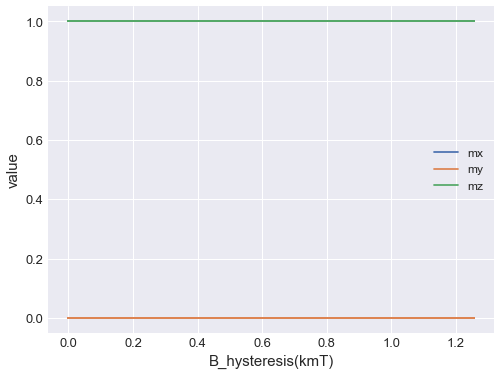

In [15]:
drive.table.mpl(x="B_hysteresis", y=["mx", "my", "mz"])

In [16]:
drive.n

41

In [17]:
drive[0]

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m)

In [18]:
list(drive)

[Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4),

In [19]:
# drive.ovf2vtk()

In [20]:
drive.slider()

IntSlider(value=0, description='step', max=40)

In [21]:
data[-2].info

{'drive_number': 5,
 'date': '2022-02-11',
 'time': '12:51:46',
 'driver': 'MinDriver'}

In [22]:
data[-2].n

14

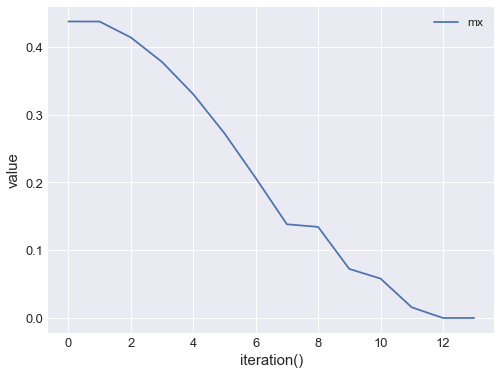

In [23]:
data[-2].table.mpl(y=["mx"])

In [24]:
data[-2].to_xarray()

<xarray.DataArray 'field' (iteration: 14, x: 20, y: 10, z: 4, comp: 3)>
array([[[[[ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05]],

         [[ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05]],

         [[ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05]],

         ...,

         [[ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
          [ 3.50067876e+05,  6.98022374e+05,  1.73831088e+05],
...
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05]],

         ...,

         [[-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05]],

         [[-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05]],

         [[-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05],
          [-3.23245347e-06, -6.44538731e-06,  8.00000000e+05]]]]])
Coordinates:
  * x          (x) float64 2.5e-09 7.5e-09 1.25e-08 ... 9.25e-08 9.75e-08
  * y          (y) float64 2.5e-09 7.5e-09 1.25e-08 ... 4.25e-08 4.75e-08
  * z          (z) float64 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * comp       (comp) <U1 'x' 'y' 'z'
  * iteration  (iteration) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 13.0
Attributes:
    units:         A/m
    cell:          (5e-09, 5e-09, 5e-09)
    p1:            (0.0, 0.0, 0.0)
    p2:            (1e-07, 5e-08, 2e-08)
    drive_number:  5
    date:          2022-02-11
    time:          12:51:46
    driver:        MinDriver

In [25]:
combined = data[0] << data[1] << data[2]
combined

CombinedDrive(
  Drive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Drive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Drive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t')
)

In [26]:
combined.drives

(Drive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
 Drive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
 Drive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'))

In [27]:
combined.info

{'drive_numbers': [0, 1, 2], 'driver': 'TimeDriver'}

In [28]:
combined.m0

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=None)

In [29]:
combined.n

50

In [30]:
combined.table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_exchange,max_spin_ang_exchange,stage_max_spin_ang_exchange,run_max_spin_ang_exchange,E_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-7.927158e-18,37.0,12887.982100,-4.597480e-07,-3.443143e-19,0.0,0.0,0.0,0.0,-7.927158e-18,6.0,6.0,0.0,-0.034481,0.823225,0.566668,7.487269e-13,1.000000e-12
1,-8.386742e-18,44.0,12883.356937,-4.594181e-07,-4.595843e-19,0.0,0.0,0.0,0.0,-8.386742e-18,8.0,1.0,1.0,-0.063349,0.676335,0.733865,1.000000e-12,2.000000e-12
2,-8.845987e-18,51.0,12878.473079,-4.590698e-07,-4.592452e-19,0.0,0.0,0.0,0.0,-8.845987e-18,10.0,1.0,2.0,-0.084921,0.495286,0.864569,1.000000e-12,3.000000e-12
3,-9.304875e-18,58.0,12873.331018,-4.587033e-07,-4.588878e-19,0.0,0.0,0.0,0.0,-9.304875e-18,12.0,1.0,3.0,-0.097888,0.289284,0.952225,1.000000e-12,4.000000e-12
4,-9.763387e-18,65.0,12867.931274,-4.583186e-07,-4.585121e-19,0.0,0.0,0.0,0.0,-9.763387e-18,14.0,1.0,4.0,-0.101375,0.068795,0.992467,1.000000e-12,5.000000e-12
5,-1.022151e-17,72.0,12862.274389,-4.579157e-07,-4.581183e-19,0.0,0.0,0.0,0.0,-1.022151e-17,16.0,1.0,5.0,-0.094992,-0.154991,0.983338,1.000000e-12,6.000000e-12
6,-1.067921e-17,79.0,12856.360934,-4.574947e-07,-4.577064e-19,0.0,0.0,0.0,0.0,-1.067921e-17,18.0,1.0,6.0,-0.078850,-0.370724,0.925390,1.000000e-12,7.000000e-12
7,-1.113649e-17,86.0,12850.191502,-4.570558e-07,-4.572764e-19,0.0,0.0,0.0,0.0,-1.113649e-17,20.0,1.0,7.0,-0.053553,-0.567472,0.821649,1.000000e-12,8.000000e-12
8,-1.159332e-17,93.0,12843.766712,-4.565988e-07,-4.568284e-19,0.0,0.0,0.0,0.0,-1.159332e-17,22.0,1.0,8.0,-0.020172,-0.735279,0.677464,1.000000e-12,9.000000e-12
9,-1.204968e-17,100.0,12837.087209,-4.561240e-07,-4.563626e-19,0.0,0.0,0.0,0.0,-1.204968e-17,24.0,1.0,9.0,0.019814,-0.865666,0.500230,1.000000e-12,1.000000e-11


In [31]:
list(combined)

[Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4),

In [32]:
combined.x

't'

In [33]:
combined.to_xarray()

<xarray.DataArray 'field' (t: 50, x: 20, y: 10, z: 4, comp: 3)>
array([[[[[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         ...,

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
...
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         ...,

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]]]]])
Coordinates:
  * x        (x) float64 2.5e-09 7.5e-09 1.25e-08 ... 8.75e-08 9.25e-08 9.75e-08
  * y        (y) float64 2.5e-09 7.5e-09 1.25e-08 ... 3.75e-08 4.25e-08 4.75e-08
  * z        (z) float64 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * comp     (comp) <U1 'x' 'y' 'z'
  * t        (t) float64 1e-12 2e-12 3e-12 4e-12 ... 4.4e-11 4.45e-11 4.5e-11
Attributes:
    units:          A/m
    cell:           (5e-09, 5e-09, 5e-09)
    p1:             (0.0, 0.0, 0.0)
    p2:             (1e-07, 5e-08, 2e-08)
    drive_numbers:  [0, 1, 2]
    driver:         TimeDriver

In [34]:
combined << data[0]

CombinedDrive(
  Drive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Drive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Drive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Drive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t')
)